In [48]:
import pandas as pd
from mplsoccer import Pitch, VerticalPitch, FontManager
URL_font = 'https://github.com/google/fonts/blob/main/ofl/fjallaone/FjallaOne-Regular.ttf?raw=true'
robotto_regular = FontManager(URL_font)
import matplotlib as plt

In [32]:
#Para esta parte, es necesario o poner el path completo o bien traerlo a este directorio (esta en la carpeta de data el archivo de los ids)
df = pd.read_excel('2021-10-02 - Lanus vs Central Cordoba de Santiago LPF2021.xlsx') 
jugadores = pd.read_excel('ids_jug_equipos.xlsx') 
equipos = pd.read_excel('ids_jug_equipos.xlsx', sheet_name='Equipos')

In [6]:
#analisis preliminar de que tiene el df
df.columns

Index(['Unnamed: 0', 'id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y',
       'expandedMinute', 'qualifiers', 'satisfiedEventsTypes', 'isTouch',
       'playerId', 'endX', 'endY', 'relatedEventId', 'relatedPlayerId',
       'goalMouthZ', 'goalMouthY', 'isShot', 'isGoal', 'blockedX', 'blockedY',
       'cardType', 'value', 'displayName', 'value.1', 'displayName.1',
       'value.2', 'displayName.2'],
      dtype='object')

In [45]:
#veo las acciones que tiene el partido
df['displayName.1'].value_counts()

Pass               839
BallRecovery       112
Aerial              86
BallTouch           77
Clearance           56
Foul                46
TakeOn              37
Tackle              31
CornerAwarded       28
Interception        26
Challenge           20
BlockedPass         18
MissedShots         17
Dispossessed        17
SavedShot           13
Save                12
SubstitutionOff      8
SubstitutionOn       8
KeeperPickup         7
End                  6
Card                 5
Start                4
OffsidePass          3
OffsideProvoked      3
OffsideGiven         3
Goal                 3
Punch                2
Claim                2
FormationSet         2
FormationChange      1
Name: displayName.1, dtype: int64

In [57]:
#los ids de los jugadores y equipos están en otro archivo.
jugadores = jugadores.drop_duplicates(subset='jugador')[['jugador', 'playerId']]
nombre_jugador = jugadores[jugadores['jugador'] == 'Alexander Bernabei']['jugador'].values[0]
jugadores[jugadores['jugador'] == 'Alexander Bernabei']

,jugador,playerId
148,Alexander Bernabei,386203.0


In [43]:
#al df lo puedo filtrar para que me de solo las acciones de un jugador o equipo
bernabei = df[df['playerId'] == 386203]

In [47]:
#veo solo las acciones que son recuperaciones
recup_berna = bernabei[bernabei['displayName.1'] == 'BallRecovery']

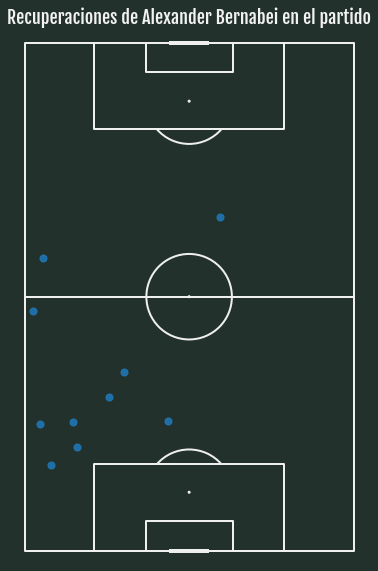

In [58]:
#como dibujar una cancha y acciones sobre la misma
#definis el objeto de cancha a gusto. Siempre para más info o para customizarlo como quieras --> https://mplsoccer.readthedocs.io/en/latest/
pitch = VerticalPitch(pitch_type='opta', line_zorder=2,  #el pitch_type es importante para que la data entre en la cancha. opta mide la cancha como 100x100m.
              pitch_color='#22312b', line_color='#efefef')
fig, ax = pitch.draw(figsize=(10, 8))
fig.set_facecolor('#22312b')

#despues de setear la cancha tenes que llenar la cancha con los datos.
ax.text(50, 105, 'Recuperaciones de '+str(nombre_jugador)+' en el partido', size='18', ha="center", va='center',fontproperties=robotto_regular.prop, color="#F2F2F2")
pitch.scatter(recup_berna.x, recup_berna.y, ax=ax, alpha=.9, s=50)

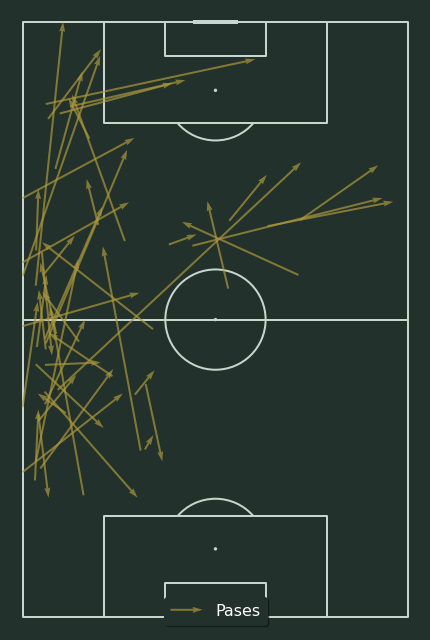

In [59]:
#mapa de pases
pases_berna = bernabei[bernabei['displayName.1'] == 'Pass']
pitch = VerticalPitch(pitch_type='opta', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 9), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

lc4 = pitch.arrows(pases_berna['x'], pases_berna['y'],
                  pases_berna['endX'], pases_berna['endY'],
                  width=2, headwidth=3, label='Pases',
                  color='#ad993c', ax=ax, alpha=.7)

l = ax.legend(shadow=True, loc='lower center', ncol=2, prop={'size': 16}, facecolor='#22312b', edgecolor='#22312b')
for text in l.get_texts():
    text.set_color("white")
#aca no se distinguen entre pases completados y no completados pero podes hacer un segundo df que filtre entre pase completado y no y graficarlo vos ;)